In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
data = sns.load_dataset('mpg')
for col in ['mpg', 'horsepower', 'weight', 'displacement']:
    data[col] = data[col].replace(np.nan, data[col].mean())

In [4]:
features = data[['horsepower', 'weight', 'displacement']]
target = data['mpg']

In [6]:
features.head()

,horsepower,weight,displacement
0,130.0,3504,307.0
1,165.0,3693,350.0
2,150.0,3436,318.0
3,150.0,3433,304.0
4,140.0,3449,302.0


In [7]:
target.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target)

In [9]:
xtrain.head()

,horsepower,weight,displacement
355,75.0,2210,107.0
51,70.0,2074,79.0
196,60.0,2164,98.0
300,90.0,3420,260.0
116,230.0,4278,400.0


In [10]:
features.head()

,horsepower,weight,displacement
0,130.0,3504,307.0
1,165.0,3693,350.0
2,150.0,3436,318.0
3,150.0,3433,304.0
4,140.0,3449,302.0


In [11]:
print(xtest.head(), xtest.shape)

horsepower  weight  displacement
0         130.0    3504         307.0
340        92.0    2620         156.0
206        72.0    2565         140.0
173        97.0    2545         119.0
311        70.0    2120          98.0 (100, 3)


In [12]:
model = LinearRegression()

In [13]:
model.fit(xtrain, ytrain)

LinearRegression()

In [14]:
model.coef_

array([-0.03832416, -0.00522285, -0.00672369])

In [15]:
model.intercept_

44.343548185448846

In [16]:
y_pred = model.predict(xtest)

In [17]:
xtest[:5]

,horsepower,weight,displacement
0,130.0,3504,307.0
340,92.0,2620,156.0
206,72.0,2565,140.0
173,97.0,2545,119.0
311,70.0,2120,98.0


In [18]:
y_pred[:5]

array([18.99638227, 26.08497313, 27.24629194, 26.53384215, 29.92950162])

In [19]:
ytest[:5]

0      18.0
340    25.8
206    26.5
173    24.0
311    32.1
Name: mpg, dtype: float64

In [20]:
mse = mean_squared_error(ytest, y_pred)
print(f"MSE : {mse}")
print(f"RMSE: {np.sqrt(mse)}")

MSE : 21.974257356093474
RMSE: 4.687670781538895


In [21]:
acc = r2_score(ytest, y_pred)
print(f"Accuracy: {acc*100}")

Accuracy: 65.43932295572039


horsepower Corr Coeff: -0.77 


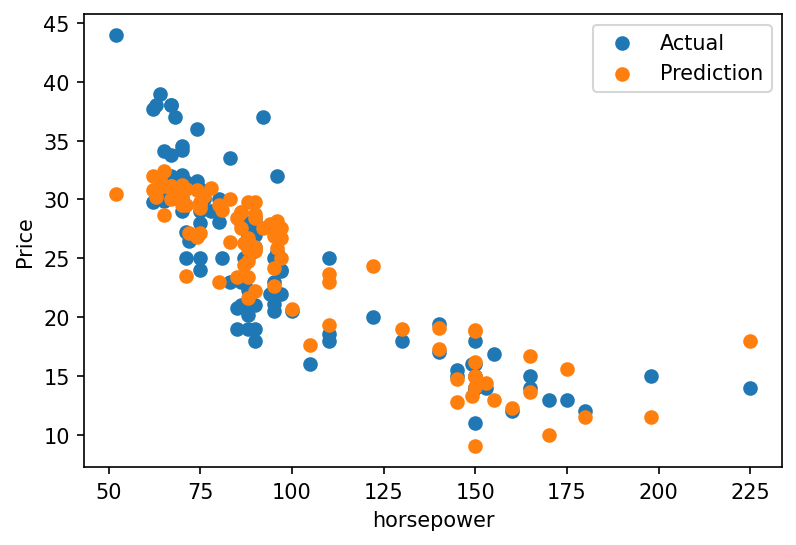

    weight Corr Coeff: -0.83 


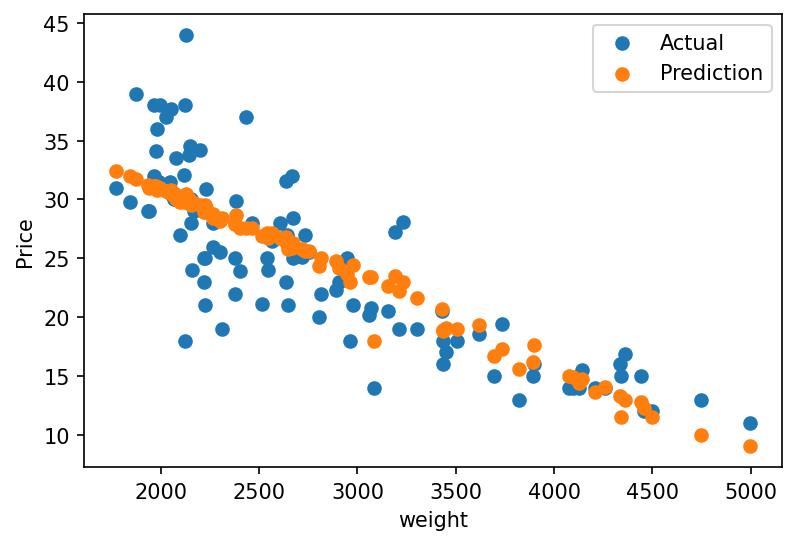

displacement Corr Coeff: -0.80 


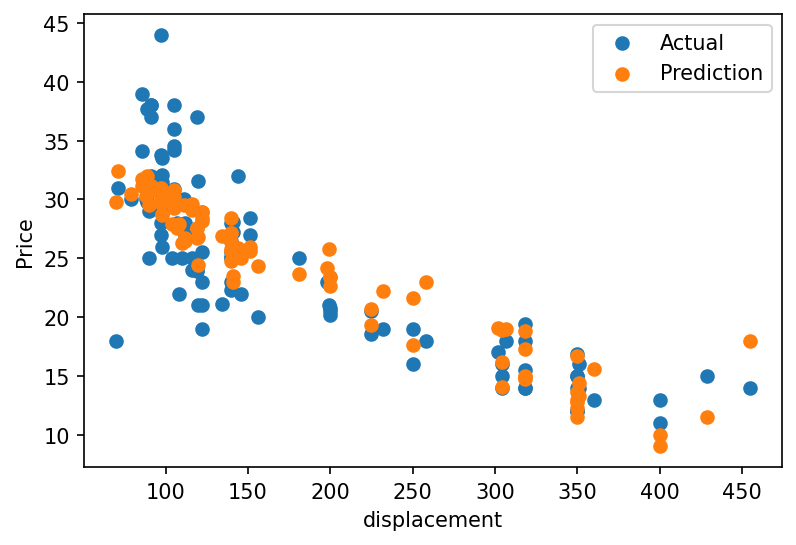

In [26]:
for col in features.columns:
    print(f"{col:>10} Corr Coeff: {np.corrcoef(features[col], target)[0][1]:>5.2f} ")
    plt.figure(dpi=150)
    plt.scatter(xtest[col], ytest, label='Actual')
    plt.scatter(xtest[col], y_pred, label='Prediction')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.legend()
    plt.show()

In [22]:
with open('mileage_data.pkl', 'wb') as fp:
    pickle.dump(model, fp)
    fp.close()